In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
coded_df = pd.read_csv("../data/processed/pop_train_encoded_.csv") 

X = coded_df.drop(['status_group','gps_height_bin','lat_lon_bin'], axis=1) #'id',
y = coded_df['status_group']
X.shape

(59400, 21)

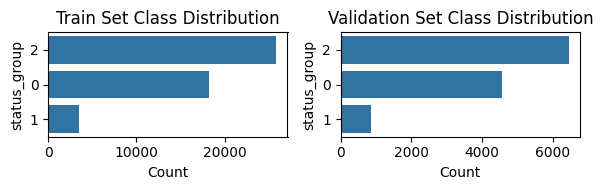

In [18]:
# Split data (X and y are already defined)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check class distribution
def plot_class_distribution(y1, y2, labels=["Train", "Validation"]):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2))
    for ax, y_split, label in zip(axs, [y1, y2], labels):
        sns.countplot(y=y_split, order=y.value_counts().index, ax=ax)
        ax.set_title(f"{label} Set Class Distribution")
        ax.set_xlabel("Count")
    plt.tight_layout()
    plt.show()

plot_class_distribution(y_train, y_val)

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reusable evaluation function
def evaluate_model(model, X, y, cv=5, scoring="f1_macro"):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring=scoring)
    return scores.mean(), scores.std()

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define models
baseline_models = {
    "Dummy (Most Frequent)": DummyClassifier(strategy="most_frequent", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Evaluate each
results = []
for name, model in baseline_models.items():
    f1, std = evaluate_model(model, X_train, y_train)
    results.append((name, f1, std))


/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

In [29]:
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='multinomial')
dt_weighted = DecisionTreeClassifier(class_weight='balanced', max_depth=5)

# Add to models dict
baseline_models["LogReg (Balanced)"] = logreg_weighted
baseline_models["Decision Tree (Balanced)"] = dt_weighted

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def print_eval_metrics(model, X_val, y_val, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_val, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=model.classes_).plot(cmap='Blues')


Dummy (Most Frequent) Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4565
           1       0.00      0.00      0.00       863
           2       0.54      1.00      0.70      6452

    accuracy                           0.54     11880
   macro avg       0.18      0.33      0.23     11880
weighted avg       0.29      0.54      0.38     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.32      0.42      4565
           1       0.00      0.00      0.00       863
           2       0.60      0.88      0.71      6452

    accuracy                           0.60     11880
   macro avg       0.41      0.40      0.38     11880
weighted avg       0.56      0.60      0.55     11880


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.48      0.62      4565
           1       0.00      0.00      0.00       863
           2       0.66      0.96      0.78      6452

    accuracy                           0.70     11880
   macro avg       0.51      0.48      0.47     11880
weighted avg       0.69      0.70      0.66     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogReg (Balanced) Evaluation:
              precision    recall  f1-score   support

           0       0.54      0.45      0.49      4565
           1       0.12      0.54      0.20       863
           2       0.67      0.43      0.53      6452

    accuracy                           0.45     11880
   macro avg       0.44      0.48      0.41     11880
weighted avg       0.58      0.45      0.49     11880


Decision Tree (Balanced) Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57      4565
           1       0.18      0.46      0.26       863
           2       0.67      0.78      0.72      6452

    accuracy                           0.62     11880
   macro avg       0.58      0.55      0.52     11880
weighted avg       0.72      0.62      0.63     11880



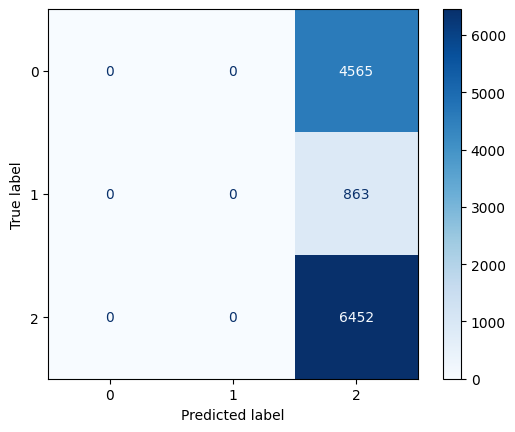

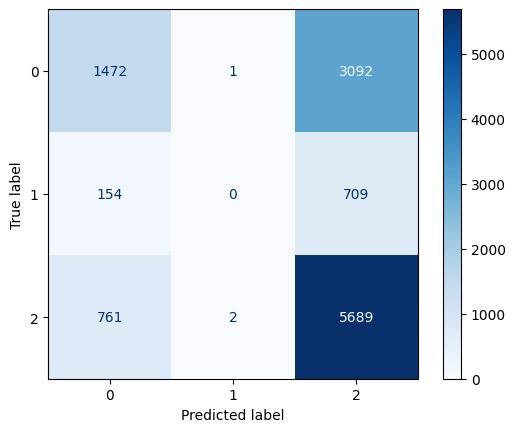

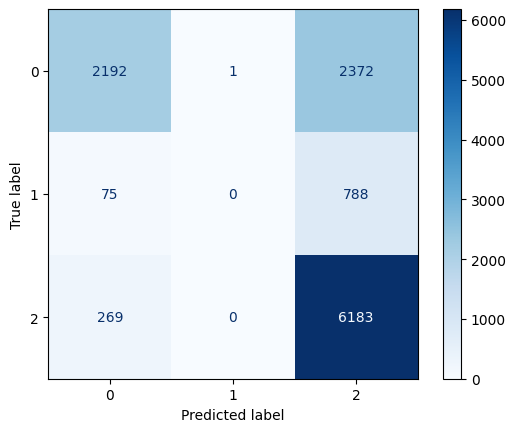

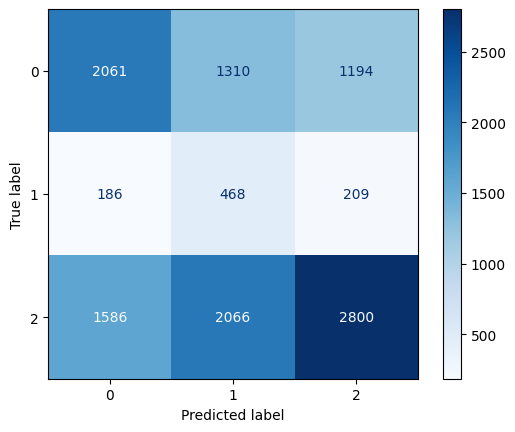

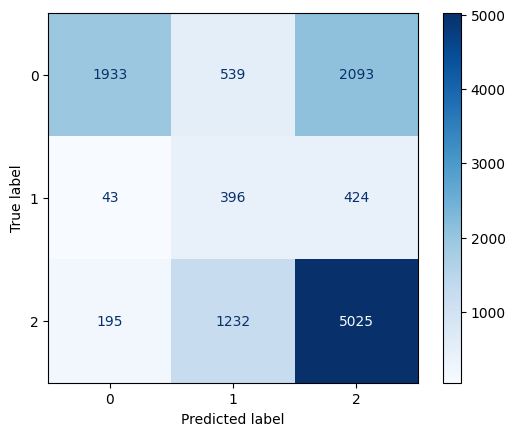

In [31]:
for name, model in baseline_models.items():
    print_eval_metrics(model, X_val, y_val, name)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Simple encoding
X = X.fillna('missing')
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4565
           1       0.52      0.35      0.42       863
           2       0.80      0.87      0.84      6452

    accuracy                           0.80     11880
   macro avg       0.72      0.67      0.69     11880
weighted avg       0.79      0.80      0.79     11880



In [33]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    scoring='f1_macro',
    cv=3,
    n_iter=20,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n

/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  40.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  41.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  37.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  36.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  34.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=None, max_feature

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [35]:
from sklearn.metrics import classification_report

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", search.best_params_)
print("F1 Macro:", search.best_score_)
print(classification_report(y_test, y_pred))


Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
F1 Macro: 0.8254203243271472
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4565
           1       0.45      0.41      0.43       863
           2       0.81      0.85      0.83      6452

    accuracy                           0.79     11880
   macro avg       0.69      0.68      0.69     11880
weighted avg       0.79      0.79      0.79     11880



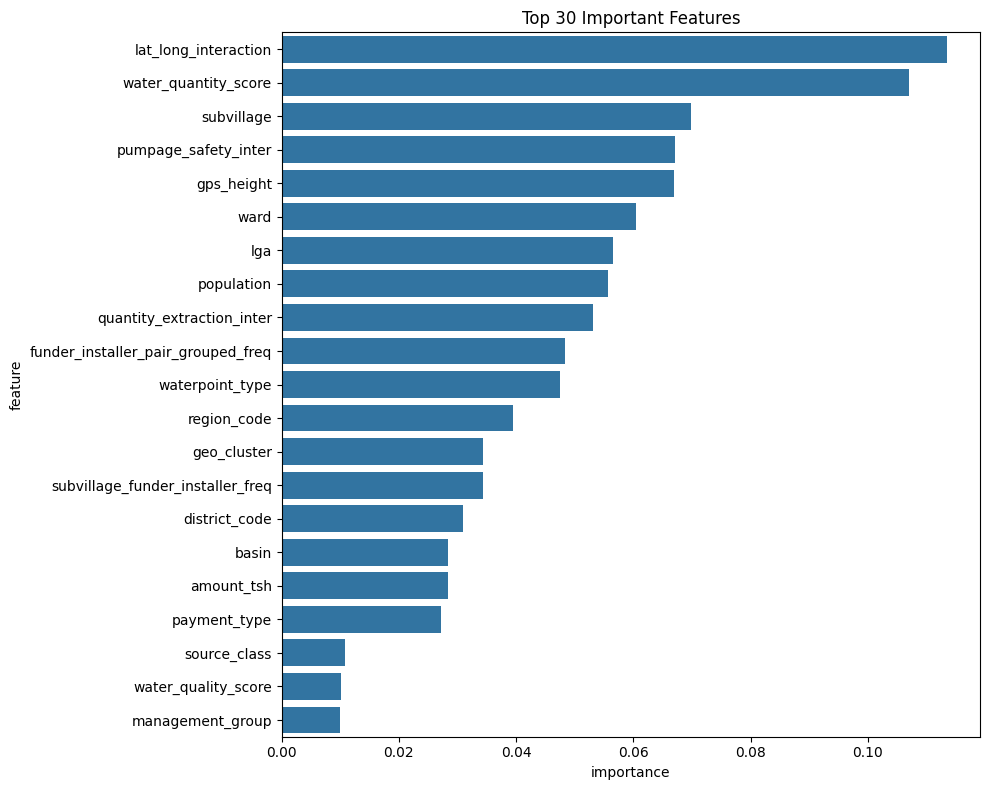

In [36]:
feat_names = X_resampled.columns
feat_imp = search.best_estimator_.feature_importances_

imp_df = pd.DataFrame({
    'feature': feat_names,
    'importance': feat_imp
}).sort_values(by='importance', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.barplot(data=imp_df.head(30), x='importance', y='feature')
plt.title("Top 30 Important Features")
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(search.best_estimator_, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print(f"CV F1-macro mean: {scores.mean():.3f}")

CV F1-macro mean: 0.841


In [40]:
import joblib

joblib.dump(best_model, 'random_forest_model.joblib')

# Now you can use model.predict() or model.predict_proba() as usual 

['random_forest_model.joblib']

In [42]:
test_Set = pd.read_csv("../data/processed/pop_test_encoded_.csv")
test_Set.drop(['gps_height_bin', 'lat_lon_bin'], axis=1, inplace=True)
test_Set.shape

(14850, 22)

In [43]:
test_Set = test_Set.set_index('id')

In [44]:
y_test_pred = best_model.predict(test_Set)

In [45]:
test_ids = test_Set.index.to_series().reset_index(drop=True)

In [46]:
status_mapping = {
    'non functional': 0,
    'functional needs repair': 1,
    'functional': 2
}

reverse_mapping = {v: k for k, v in status_mapping.items()}

# If y_test_pred is a NumPy array or Series of encoded labels
decoded_preds = [reverse_mapping[pred] for pred in y_test_pred]

In [47]:
submission_RF = pd.DataFrame({
    'id': test_ids,         # this must match the test file format
    'status_group': decoded_preds  # target column as expected in submission
})


submission_RF.to_csv("../data/result/submission_RF_pop.csv", index=False)

In [50]:
# Load sample submission with correct IDs
sample_submission = pd.read_csv('../data/raw/Submission_Format.csv')

# Load your predictions (with id and prediction columns)
my_preds = pd.read_csv('../data/result/submission_RF.csv')

# Merge sample_submission with your predictions on 'id'
merged = sample_submission[['id']].merge(my_preds[['id', 'status_group']], on='id', how='left')

# Replace prediction column in sample submission
sample_submission['status_group'] = merged['status_group']

# Check if any predictions are missing (optional)
if sample_submission['status_group'].isnull().any():
    missing_ids = sample_submission[sample_submission['status_group'].isnull()]['id'].tolist()
    print(f"Warning: Missing predictions for IDs: {missing_ids}")

# Save new submission file
sample_submission.to_csv('../data/result/RN_submission.csv', index=False)

# Catboost

In [64]:
cat_train_df = pd.read_csv("../data/processed/imputed_latlon_fI_pumpage_pop_gps.csv")

Xc = cat_train_df.drop(['status_group','id'], axis=1)
yc = cat_train_df['status_group']

cat_features = Xc.select_dtypes(include='object').columns.tolist()

print(cat_train_df.shape)
print(cat_train_df.columns)

(59400, 48)
Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'funder_installer_pair_grouped', 'subvillage_funder_installer',
       'unknown_construction_year', 'pump_age', 'water_quantity_score',
       'water_quality_score', 'water_availability_index', 'water_safety_sum',
       'gps_height_bin', 'lat_lon_bin'],
      dtype='object')


In [65]:
from catboost import CatBoostClassifier

# CatBoost can automatically handle missing values and categorical variables
modelc = CatBoostClassifier(
    eval_metric='MultiClass',     # default multi-class logloss (single scalar)
    custom_metric='F1',
    iterations=1000,
    early_stopping_rounds=50,
    learning_rate=0.1,
    depth=6,
    verbose=100,
    random_seed=42
)


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report
from catboost import CatBoostClassifier

# --- STEP 1: Split your data (train/test) ---
X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.2, stratify=yc, random_state=42
)

# --- STEP 2: Handle class imbalance ---
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
# Convert dict to list in class index order
catboost_class_weights = [class_weights[cls] for cls in sorted(class_weights)]


# --- STEP 3: Define model ---
model = CatBoostClassifier(
    verbose=0,
    random_seed=42,
    eval_metric='MultiClass',
    early_stopping_rounds=None,
    #use_best_model=True,
    class_weights=catboost_class_weights
   
)

# --- STEP 4: Define hyperparameter search space ---
param_dist = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3],
    'iterations': [100, 200]
}

# --- STEP 5: Set up randomized search with stratified CV ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='f1_macro',
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1
)

In [7]:
import time
start = time.time()
model.fit(X_train, y_train, cat_features=cat_features)
print("Train time:", time.time() - start, "seconds")


Train time: 338.28098368644714 seconds


Fitting 3 folds for each of 5 candidates, totalling 15 fits
F1 Macro: 0.6652456242676461
Classification Report:
                          precision    recall  f1-score   support

             functional       0.85      0.74      0.79      6452
functional needs repair       0.28      0.71      0.41       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.74     11880
              macro avg       0.66      0.74      0.67     11880
           weighted avg       0.81      0.74      0.77     11880



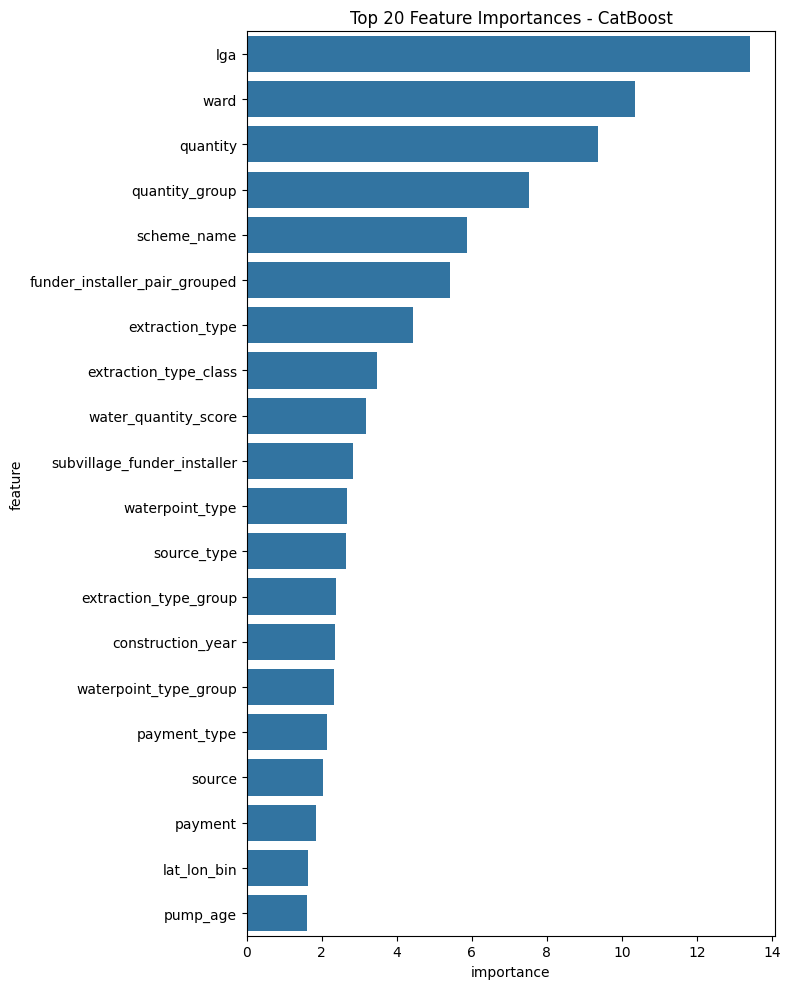

In [67]:
# Identify categorical feature indices
# cat_features = ['region', 'extraction_type', 'installer', ...]
# If using DataFrame: you can use column names instead
search.fit(X_train, y_train, cat_features=cat_features)

# --- STEP 6: Evaluate best model ---
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
print("F1 Macro:", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- STEP 7: (Optional) Feature importance ---
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = best_model.get_feature_importance()
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

imp_df = pd.DataFrame({'feature': features, 'importance': feat_importance})
imp_df = imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(data=imp_df.head(20), x='importance', y='feature')
plt.title("Top 20 Feature Importances - CatBoost")
plt.tight_layout()
plt.show()

========All features======
Fitting 3 folds for each of 5 candidates, totalling 15 fits
F1 Macro: 0.6441219879763275
Classification Report:
                          precision    recall  f1-score   support

             functional       0.83      0.72      0.77      6452
functional needs repair       0.27      0.69      0.39       863
         non functional       0.83      0.73      0.78      4565

               accuracy                           0.72     11880
              macro avg       0.64      0.71      0.64     11880
           weighted avg       0.79      0.72      0.74     11880

==== Imputed lat lon + funder installer =========
F1 Macro: 0.6729553162268974
                          precision    recall  f1-score   support

             functional       0.85      0.75      0.80      6452
functional needs repair       0.30      0.68      0.42       863
         non functional       0.84      0.77      0.80      4565

               accuracy                           0.75     11880
              macro avg       0.66      0.73      0.67     11880
           weighted avg       0.80      0.75      0.77     11880

===== dropping duplicate and many missing value columns ========
F1 Macro: 0.6501121504651596
Classification Report:
                          precision    recall  f1-score   support

             functional       0.84      0.72      0.78      6452
functional needs repair       0.27      0.69      0.39       863
         non functional       0.82      0.75      0.78      4565

               accuracy                           0.73     11880
              macro avg       0.65      0.72      0.65     11880
           weighted avg       0.80      0.73      0.75     11880

====== imputed population, gps_heights, water_score =======
F1 Macro: 0.6597909078122569
Classification Report:
                          precision    recall  f1-score   support

             functional       0.85      0.73      0.79      6452
functional needs repair       0.28      0.70      0.40       863
         non functional       0.83      0.76      0.79      4565

               accuracy                           0.74     11880
              macro avg       0.65      0.73      0.66     11880
           weighted avg       0.80      0.74      0.76     11880

===== Imputed lat lon + funder installer + population + gps_heights + water_score ====
F1 Macro: 0.6598967808821029
Classification Report:
                          precision    recall  f1-score   support

             functional       0.85      0.73      0.79      6452
functional needs repair       0.28      0.71      0.40       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.74     11880
              macro avg       0.65      0.73      0.66     11880
           weighted avg       0.80      0.74      0.76     11880

In [68]:
test_Set = pd.read_csv("../data/processed/test_imputed_latlon_fI_pumpage_pop_gps.csv")
test_Set.shape

(14850, 47)

In [69]:
# Step 2: Save 'id' column separately
test_ids = test_Set['id'].copy()

# Step 3: Drop 'id' from the features
test_Set.drop(['id'], axis=1, inplace=True)

# Step 4: Predict
y_test_pred = best_model.predict(test_Set)

# Ensure predictions are 1D
if len(y_test_pred.shape) > 1:
    y_test_pred = np.argmax(y_test_pred, axis=1)

# Step 5: Prepare submission
submission_cat = pd.DataFrame({
    'id': test_ids,
    'predicted': y_test_pred
})

# Step 6: Save submission
submission_cat.to_csv("../data/result/submission_catboost.csv", index=False)

In [71]:
print(np.unique(y_test_pred, return_counts=True))

(array([0]), array([14850]))


In [72]:
print(np.unique(y_train))


['functional' 'functional needs repair' 'non functional']
